## Importing the Dependencies

##### Importing required modules For data Preprocessing

In [1]:
import pandas as pd 
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler

import warnings
warnings.filterwarnings("ignore")

##### Importing required model For data vizualization

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

##### Importing required model For modelling

In [3]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn import svm
from sklearn.naive_bayes import GaussianNB

##  Loading the Dataset into the System

In [4]:
# loading the dataset to pandas DataFrame
df = pd.read_csv('C:\\Users\\lalatendu\\Desktop\\All_project\\Bank_Loan_Prediction\\dataset.csv')

#### Making a copy of the dataset 

In [5]:
loan_dataset = df.copy()

## Exploring the Dataset

In [6]:
type(loan_dataset)

pandas.core.frame.DataFrame

In [7]:
# printing the first 5 rows of the dataframe
loan_dataset.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [8]:
loan_dataset.shape

(614, 13)

In [9]:
loan_dataset["Dependents"].value_counts()

0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64

In [10]:
loan_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [11]:
# statistical measures
loan_dataset.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [12]:
# Checking the columns present
loan_dataset.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

## Explaratrory Data Analysis

Y    422
N    192
Name: Loan_Status, dtype: int64

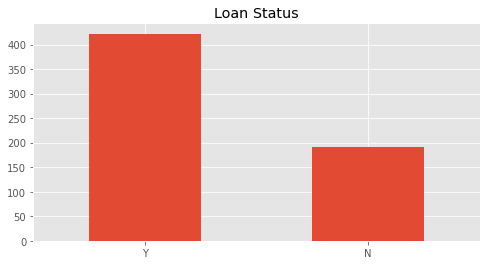

In [13]:
plt.style.use('ggplot')
loan_dataset['Loan_Status'].value_counts().plot.bar(title='Loan Status',figsize=(8,4),rot=0)
display(loan_dataset['Loan_Status'].value_counts())

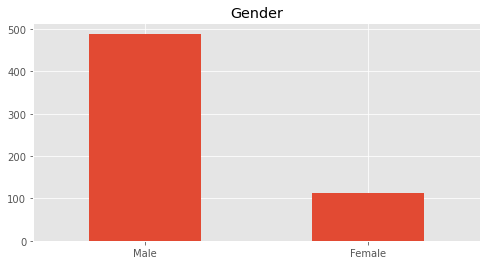

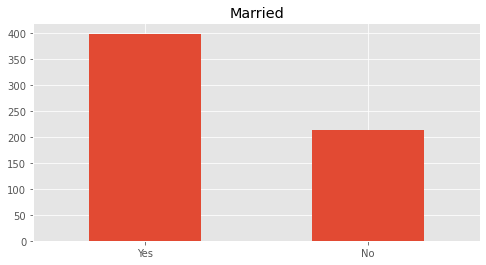

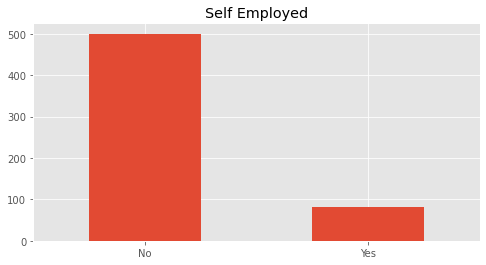

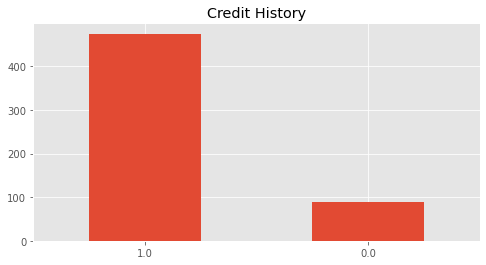

In [14]:
data = ['Gender', 'Married','Self_Employed','Credit_History']

for col in data:
    fig,axes = plt.subplots(1,1,figsize=(8,4))
    k = col.replace('_',' ')
    loan_dataset[col].value_counts().plot.bar(title=k, rot=0)
    

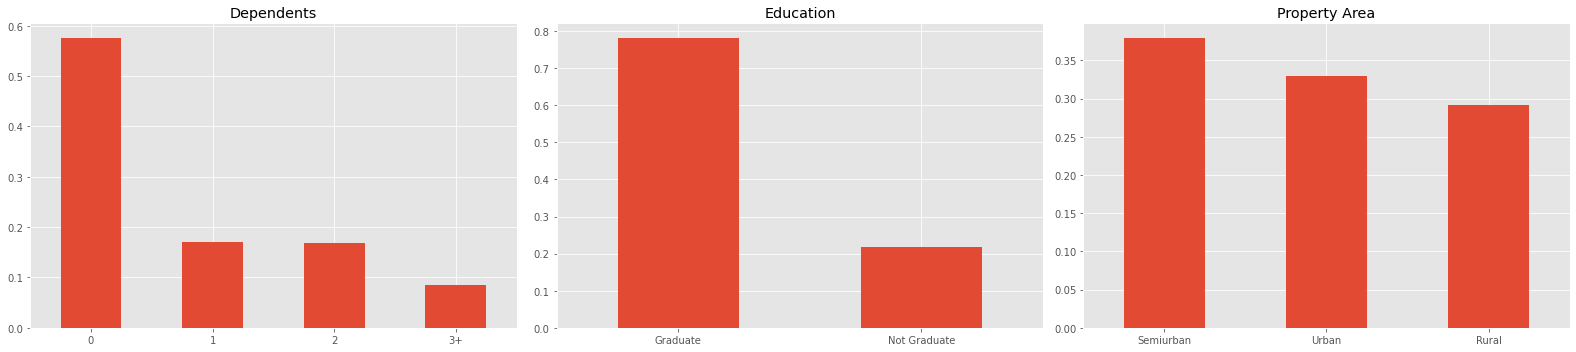

In [15]:
fig2, ax2= plt.subplots(1,3)

loan_dataset['Dependents'].value_counts(normalize=True).plot(figsize=(22,5),ax=ax2[0],kind='bar',title= 'Dependents',rot=0)

loan_dataset['Education'].value_counts(normalize=True).plot(ax=ax2[1],kind='bar',title= 'Education',rot=0)

loan_dataset['Property_Area'].value_counts(normalize=True).plot(ax=ax2[2],kind='bar',title= 'Property Area',rot=0)

fig2.tight_layout()

<AxesSubplot:>

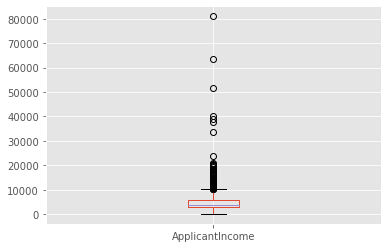

In [16]:
#Checking outlier in applicantincome column
loan_dataset.boxplot(column='ApplicantIncome')

<AxesSubplot:>

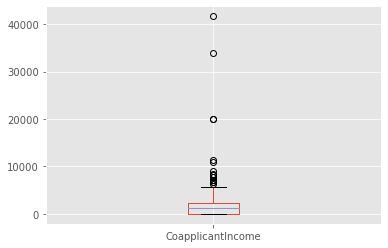

In [17]:
loan_dataset.boxplot(column='CoapplicantIncome')

<AxesSubplot:>

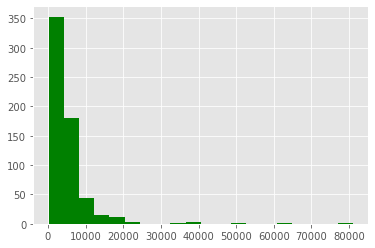

In [18]:
#using histogram to analyze Applicant income
loan_dataset['ApplicantIncome'].hist(bins=20,color='green')

It can be inferred that most of the data in Applicant income is towards left which means it is not normally distributed. The boxplot confirms the presence of outliers. This can be attributed to income disparity in the society.

From above histogram, We can analyze that maximum applicants having income between 0-10000 and very few have income above 40000.

<AxesSubplot:>

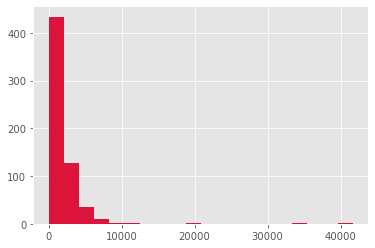

In [19]:
loan_dataset['CoapplicantIncome'].hist(bins=20,color='crimson')

<AxesSubplot:title={'center':'ApplicantIncome'}, xlabel='Education'>

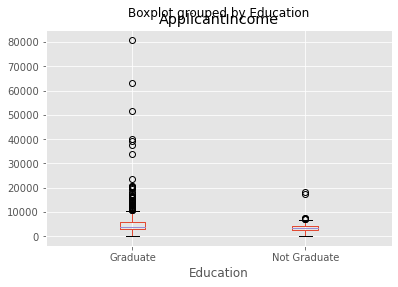

In [20]:
loan_dataset.boxplot(column ='ApplicantIncome', by='Education')

from above boxplot we can analyze applicant income by education category .

<AxesSubplot:>

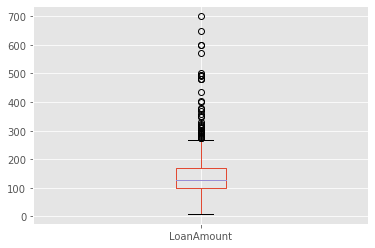

In [21]:
#Lets check outlier loan amount
loan_dataset.boxplot(column ='LoanAmount')

<AxesSubplot:>

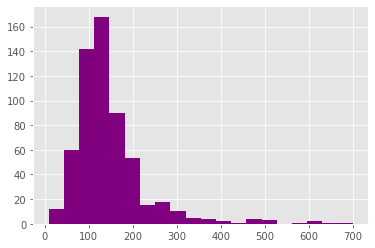

In [22]:
#Drawing histogram to analyze the loan amount distribution
loan_dataset['LoanAmount'].hist(bins=20,color='purple')

<AxesSubplot:>

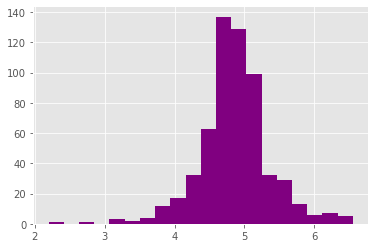

In [23]:
#normalizing the dataset using log function
loan_dataset['LoanAmount_log'] = np.log(loan_dataset['LoanAmount'])
loan_dataset['LoanAmount_log'].hist(bins=20,color='purple')

In [24]:
# checkin number of missing values in each column
loan_dataset.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
LoanAmount_log       22
dtype: int64

## Filling missing values

In [25]:
loan_dataset['Gender'].fillna(loan_dataset['Gender'].mode()[0],inplace=True)
loan_dataset['Married'].fillna(loan_dataset['Married'].mode()[0],inplace=True)
loan_dataset['Dependents'].fillna(loan_dataset['Dependents'].mode()[0],inplace=True)
loan_dataset['Self_Employed'].fillna(loan_dataset['Self_Employed'].mode()[0],inplace=True)

In [26]:
loan_dataset['LoanAmount'].isnull().sum()

22

In [27]:
loan_dataset['LoanAmount'].mean()

146.41216216216216

In [28]:
loan_dataset.LoanAmount = loan_dataset.LoanAmount.fillna(loan_dataset.LoanAmount.mean())

In [29]:
loan_dataset.LoanAmount_log = loan_dataset.LoanAmount_log.fillna(loan_dataset.LoanAmount_log.mean())

In [30]:
loan_dataset['Loan_Amount_Term'].fillna(loan_dataset['Loan_Amount_Term'].mode()[0],inplace=True)
loan_dataset['Credit_History'].fillna(loan_dataset['Credit_History'].mode()[0],inplace=True)

In [31]:
loan_dataset.shape

(614, 14)

In [32]:
# checking number of missing values in each column
loan_dataset.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
LoanAmount_log       0
dtype: int64

We can see all the null values are replaced from the dataset,there is no more null value present

In [33]:
loan_dataset['Loan_Status'].value_counts()          

Y    422
N    192
Name: Loan_Status, dtype: int64

In [34]:
# label encoding
loan_dataset.replace({"Loan_Status":{'N':0,'Y':1}},inplace=True)

#### As we have seen before ApplicantIncome and CoapplicantIncome are not in normalized form so let's try to normalize these values

In [35]:
loan_dataset['Totalincome']=loan_dataset['ApplicantIncome']+loan_dataset['CoapplicantIncome']
loan_dataset['Totalincome'] = np.log(loan_dataset['Totalincome'])

<AxesSubplot:>

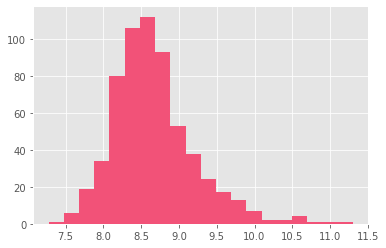

In [36]:
loan_dataset['Totalincome'].hist(bins=20,color="#F25278")

In [37]:
loan_dataset.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,LoanAmount_log,Totalincome
0,LP001002,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,1,4.857444,8.674026
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,0,4.852030,8.714568
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,1,4.189655,8.006368
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,1,4.787492,8.505323
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,1,4.948760,8.699515


In [38]:
# Dependent column values
loan_dataset['Dependents'].value_counts()

0     360
1     102
2     101
3+     51
Name: Dependents, dtype: int64

In [39]:
# replacing the value of 3+ to 4
loan_dataset = loan_dataset.replace(to_replace='3+', value=4)

In [40]:
# dependent values
loan_dataset['Dependents'].value_counts()

0    360
1    102
2    101
4     51
Name: Dependents, dtype: int64

## Data Visualization

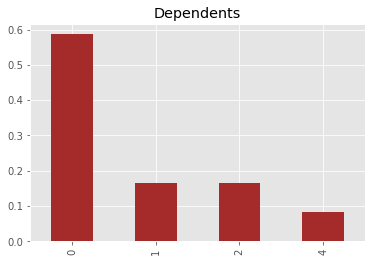

In [41]:
loan_dataset['Dependents'].value_counts(normalize=True).plot.bar( title='Dependents', color="brown")
plt.show()

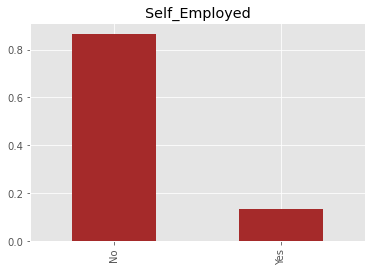

In [42]:
loan_dataset['Self_Employed'].value_counts(normalize=True).plot.bar( title='Self_Employed', color="brown")
plt.show()

### Bi-variate Analysis

<AxesSubplot:xlabel='Self_Employed', ylabel='count'>

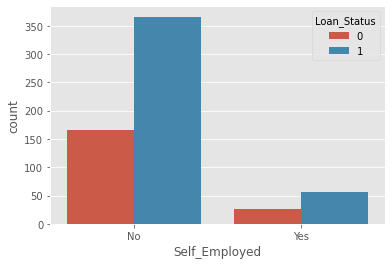

In [43]:
# Self_Employed & Loan Status
sns.countplot(x='Self_Employed',hue='Loan_Status',data=loan_dataset)

<AxesSubplot:xlabel='Education', ylabel='count'>

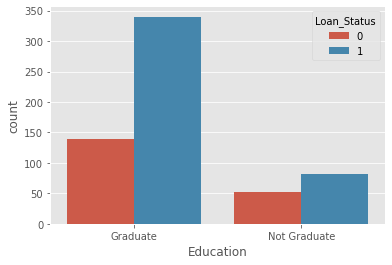

In [44]:
# education & Loan Status
sns.countplot(x='Education',hue='Loan_Status',data=loan_dataset)

<AxesSubplot:xlabel='Married', ylabel='count'>

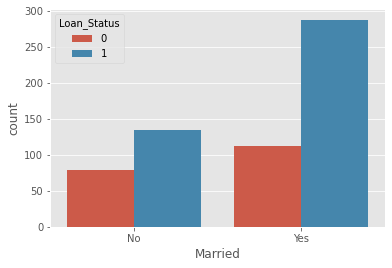

In [45]:
# marital status & Loan Status
sns.countplot(x='Married',hue='Loan_Status',data=loan_dataset)

 #### Converting categorical columns to numerical values

In [46]:
# convert categorical columns to numerical values
loan_dataset.replace({'Married':{'No':0,'Yes':1},'Gender':{'Male':1,'Female':0},'Self_Employed':{'No':0,'Yes':1},
                      'Property_Area':{'Rural':0,'Semiurban':1,'Urban':2},'Education':{'Graduate':1,'Not Graduate':0}},inplace=True)

In [47]:
#Converting dependent type object to integer
loan_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             614 non-null    int64  
 2   Married            614 non-null    int64  
 3   Dependents         614 non-null    object 
 4   Education          614 non-null    int64  
 5   Self_Employed      614 non-null    int64  
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         614 non-null    float64
 9   Loan_Amount_Term   614 non-null    float64
 10  Credit_History     614 non-null    float64
 11  Property_Area      614 non-null    int64  
 12  Loan_Status        614 non-null    int64  
 13  LoanAmount_log     614 non-null    float64
 14  Totalincome        614 non-null    float64
dtypes: float64(6), int64(7), object(2)
memory usage: 72.1+ KB


In [48]:
loan_dataset['Dependents']=loan_dataset['Dependents'].astype('int')

In [49]:
loan_dataset.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,LoanAmount_log,Totalincome
0,LP001002,1,0,0,1,0,5849,0.0,146.412162,360.0,1.0,2,1,4.857444,8.674026
1,LP001003,1,1,1,1,0,4583,1508.0,128.000000,360.0,1.0,0,0,4.852030,8.714568
2,LP001005,1,1,0,1,1,3000,0.0,66.000000,360.0,1.0,2,1,4.189655,8.006368
3,LP001006,1,1,0,0,0,2583,2358.0,120.000000,360.0,1.0,2,1,4.787492,8.505323
4,LP001008,1,0,0,1,0,6000,0.0,141.000000,360.0,1.0,2,1,4.948760,8.699515


In [50]:
loan_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             614 non-null    int64  
 2   Married            614 non-null    int64  
 3   Dependents         614 non-null    int32  
 4   Education          614 non-null    int64  
 5   Self_Employed      614 non-null    int64  
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         614 non-null    float64
 9   Loan_Amount_Term   614 non-null    float64
 10  Credit_History     614 non-null    float64
 11  Property_Area      614 non-null    int64  
 12  Loan_Status        614 non-null    int64  
 13  LoanAmount_log     614 non-null    float64
 14  Totalincome        614 non-null    float64
dtypes: float64(6), int32(1), int64(7), object(1)
memory usage: 69.7+ KB


In [51]:
# separating the data and label
x = loan_dataset.drop(columns=['Loan_ID','Loan_Status','Loan_Amount_Term'],axis=1)
y = loan_dataset['Loan_Status']

In [52]:
print(x)

     Gender  Married  Dependents  Education  Self_Employed  ApplicantIncome  \
0         1        0           0          1              0             5849   
1         1        1           1          1              0             4583   
2         1        1           0          1              1             3000   
3         1        1           0          0              0             2583   
4         1        0           0          1              0             6000   
..      ...      ...         ...        ...            ...              ...   
609       0        0           0          1              0             2900   
610       1        1           4          1              0             4106   
611       1        1           1          1              0             8072   
612       1        1           2          1              0             7583   
613       0        0           0          1              1             4583   

     CoapplicantIncome  LoanAmount  Credit_History 

In [53]:
print(y)

0      1
1      0
2      1
3      1
4      1
      ..
609    1
610    1
611    1
612    1
613    0
Name: Loan_Status, Length: 614, dtype: int64


### Splitting the dataset into Train and Test dataset

In [54]:
x_train, x_test,y_train,y_test = train_test_split(x,y,test_size=0.1,stratify=y,random_state=2)

In [55]:
print(x.shape, x_train.shape, x_test.shape)

(614, 12) (552, 12) (62, 12)


## Model Training

### Training the model With SVM

In [56]:
#Taking an instance of SVM
classifier = svm.SVC(kernel = "linear")

In [ ]:
#training the support Vector Macine model
classifier.fit(x_train,y_train)

##### Model Evaluation

In [ ]:
# accuracy score on training data
x_train_prediction = classifier.predict(x_train)
training_data_accuray = accuracy_score(x_train_prediction,y_train)
training_data_accuray= "{:.2f}".format(training_data_accuray)
print('Accuracy on training data : ', training_data_accuray)

In [ ]:
# accuracy score on training data
x_test_prediction = classifier.predict(x_test)
test_data_accuray = accuracy_score(x_test_prediction,y_test)
test_data_accuray = "{:.2f}".format(test_data_accuray)
print('Accuracy on test data : ', test_data_accuray)

### Training Model with Logistic regression

In [ ]:
log = LogisticRegression()
log.fit(x_train,y_train)

##### Model Evalution

In [ ]:
x_train_prediction = log.predict(x_train)
training_data_accuracy = accuracy_score(x_train_prediction,y_train)
training_data_accuracy = "{:.2f}".format(training_data_accuracy)
print("Accuracy score is :",training_data_accuracy)

In [ ]:
x_test_prediction = log.predict(x_test)
testing_data_accuracy = accuracy_score(x_test_prediction,y_test)
testing_data_accuracy = "{:.2f}".format(testing_data_accuracy)
print("Accuracy score is :",testing_data_accuracy)

## Training the model using Decision Tree

In [ ]:
dt = DecisionTreeClassifier() 
dt.fit(x_train,y_train)

##### Model Evalution

In [ ]:
x_train_prediction = dt.predict(x_train)
training_data_accuracy = accuracy_score(x_train_prediction,y_train)
training_data_accuracy = "{:.2f}".format(training_data_accuracy)
print("Accuracy score is :",training_data_accuracy)

In [ ]:
x_test_prediction = dt.predict(x_test)
testing_data_accuracy = accuracy_score(x_test_prediction,y_test)
print("Accuracy score is :",testing_data_accuracy)

## Training the model with Naive Bayes

In [ ]:
NBClassifier = GaussianNB()
NBClassifier.fit(x_train,y_train)

##### Model evalution

In [ ]:
x_train_prediction = NBClassifier.predict(x_train)
training_data_accuracy = accuracy_score(x_train_prediction,y_train)
training_data_accuracy = "{:.2f}".format(training_data_accuracy)
print("Accuracy score is :",training_data_accuracy)

In [ ]:
x_test_prediction = NBClassifier.predict(x_test)
testing_data_accuracy = accuracy_score(x_test_prediction,y_test)
testing_data_accuracy = "{:.2f}".format(testing_data_accuracy)
print("Accuracy score is :",testing_data_accuracy)

As Logistic regression is giving more accuracy it can be considered as final Model .

## Making predictive system

#### 1 => Credit Approved 
#### 0 => Credit Disapproved

In [ ]:
#taking input 
input = ("LP001087","Female","No",2,"Graduate","No",3750,2083,120,360,1,"Semiurban")
#input = ("LP001091","Male","Yes",1,"Graduate","No",4166,3369,201,360,0,"Urban")
ipt = list(input)

#Removing non-required columns i.e. Loan_Amount_Term and Loan_ID

del ipt[0] 
del ipt[8]

print(ipt)

In [ ]:
#Converting into numerical columns

if ipt[0]=="Male":
    ipt[0]=1
else:
    ipt[0]=0
if ipt[1]=="Yes":
    ipt[1]=1
else:
    ipt[1]=0
if ipt[3]=="Graduate":
    ipt[3]=1
else:
    ipt[3]=0
if ipt[4]=="Yes":
    ipt[4]=1
else:
    ipt[4]=0
if ipt[9]=="Urban":
    ipt[9]=2
elif ipt[9]=="Semiurban":
    ipt[9]=1
else:
    ipt[9]=0
    
    
print(ipt)    

In [ ]:
#Generating Total income and 
#Total income = Applicant income + Co-applicant income
t_inc = ipt[5]+ipt[6]


t_inc_log = np.log(t_inc)

tt = np.log(ipt[7])
if len(ipt)<=11:
    ipt.append(tt)
if len(ipt)<=11:
    ipt.append(t_inc_log)
    
print(ipt)

In [ ]:
#changing  input to numpy array
input_array = np.asarray(ipt)

#reshape the array as we predicting for only one instance
reshape_data = input_array.reshape(1,-1)

In [ ]:
#standardizing the input data
scaler = StandardScaler()
#fitting the all data to scalar
scaler.fit(reshape_data)
standardize_data = scaler.transform(reshape_data)


# prediction
pred = log.predict(reshape_data)

In [ ]:
if(pred[0]==1):
    print("Credit Approved")
else:
    print("Credit not Approved")

In [ ]:
# scaler = StandardScaler()
# #fitting the all data to scalar
# scaler.fit(x)
# standardize_data = scaler.transform(x)